In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import joblib

In [2]:
datos = pd.read_csv('./Datasets/frames_erosion.csv')

In [3]:
X = datos.drop('clase', axis=1)
y = datos['clase']

In [4]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=65)
#NOTA: el parametro RANDOM_STATE tiene relación indirecta con el porcentaje de aciertos del modelo 70% y 30%
print(X_entrenamiento)

       x1   x2   x3   x4   x5   x6   x7   x8   x9  x10  ...  x1143  x1144  \
3961    0    0    0    0    0    0    0    0    0    0  ...      0      0   
1689  255  255  255  255  255  255  255  255  255  255  ...      0      0   
4774    0    0    0    0    0    0    0    0    0    0  ...      0      0   
6508    0    0    0    0    0    0    0    0    0  255  ...      0      0   
305     0    0    0    0    0    0    0    0    0    0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
3399  255  255  255    0    0    0    0    0    0    0  ...      0      0   
2773    0    0    0    0    0    0    0    0    0    0  ...      0      0   
296     0    0    0    0    0    0    0    0    0    0  ...    255    255   
575     0    0    0  255  255  255    0    0    0    0  ...      0      0   
7982  255  255  255  255  255  255  255  255    0    0  ...      0      0   

      x1145  x1146  x1147  x1148  x1149  x1150  x1151  x1152  
3961      0 

In [5]:

modelo_desicionTree = DecisionTreeClassifier(criterion='entropy',splitter='best')
modelo_desicionTree.fit(X_entrenamiento,y_entrenamiento)
# indicamos que los objetos de entrada no tendran una clase prviamente asignada
modelo_desicionTree.feature_names_in_ = None
joblib.dump(modelo_desicionTree, './modelos/modelo_autonomo_decisionTree.joblib')

['./modelos/modelo_autonomo_decisionTree.joblib']

In [6]:
#la presición del modelo varia dependiendo del estado de memoria de la pc
#al momento de entrenar
predicciones = modelo_desicionTree.predict(X_prueba)
accuracy_score(predicciones,y_prueba)

c:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.997229916897507

In [7]:
#generar la matriz confusión
confusion_matrix = metrics.confusion_matrix(y_prueba, 
                                                predicciones)

confusion_matrix

array([[832,   0,   0],
       [  0, 857,   7],
       [  0,   0, 831]], dtype=int64)

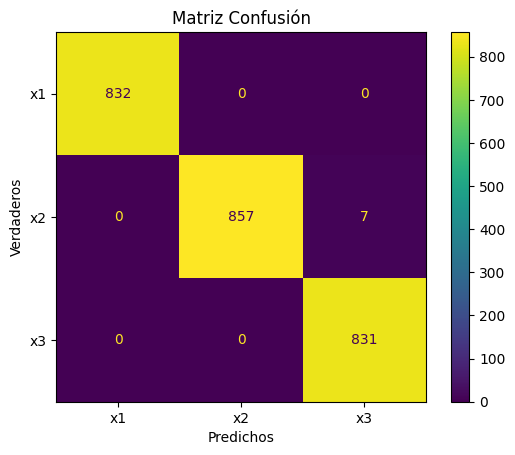

In [8]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['x1','x2','x3'])

cm_display.plot()
plt.title("Matriz Confusión")
plt.xlabel("Predichos")
plt.ylabel("Verdaderos")
plt.show()